In [8]:
pip install pymysql


In [2]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd 
import pymysql as mysqlconnector
import pandas as pd
import numpy as np

In [136]:
df_jumia = pd.read_csv("Jumia Newdataset.csv")
df_jumia.head()

,Brand_name,Price,Discount,Reviews,Image
0,GUEETON Clé USB OTG en métal 128 Go étanche av...,2500,5%,3.5 out of 5(3052),https://ci.jumia.is/unsafe/fit-in/300x300/filt...
1,GUEETON GUEETON Souris Sans Fil Rechargeable 2...,1710,5%,4 out of 5(3008),https://ci.jumia.is/unsafe/fit-in/300x300/filt...
2,GUEETON 128 GB Metal Usb Flash Drive Adapter C...,2867,5%,3.6 out of 5(1659),https://ci.jumia.is/unsafe/fit-in/300x300/filt...
3,GUEETON Souris Sans Fil Rechargeable 2.4G,1730,5%,4.1 out of 5(2126),https://ci.jumia.is/unsafe/fit-in/300x300/filt...
4,GUEETON Clé USB - OTG 128 Go Micro USB Type C ...,2600,5%,3.5 out of 5(2210),https://ci.jumia.is/unsafe/fit-in/300x300/filt...


In [ ]:
#For jumia

In [138]:
df_jumia2 = pd.read_csv("jumia_cleaned.csv")
df_jumia2.head()

,brand_name,Price,discount,Reviews,image_url,Reviews_rating,Reviews_count
0,GUEETON Clé USB OTG en métal 128 Go étanche av...,2500.0,5%,3.5 out of 5(3052),https://ci.jumia.is/unsafe/fit-in/300x300/filt...,3.5,3052.0
1,GUEETON GUEETON Souris Sans Fil Rechargeable 2...,1710.0,5%,4 out of 5(3008),https://ci.jumia.is/unsafe/fit-in/300x300/filt...,4.0,3008.0
2,GUEETON 128 GB Metal Usb Flash Drive Adapter C...,2867.0,5%,3.6 out of 5(1659),https://ci.jumia.is/unsafe/fit-in/300x300/filt...,3.6,1659.0
3,GUEETON Souris Sans Fil Rechargeable 2.4G,1730.0,5%,4.1 out of 5(2126),https://ci.jumia.is/unsafe/fit-in/300x300/filt...,4.1,2126.0
4,GUEETON Clé USB - OTG 128 Go Micro USB Type C ...,2600.0,5%,3.5 out of 5(2210),https://ci.jumia.is/unsafe/fit-in/300x300/filt...,3.5,2210.0


In [6]:
import pymysql
import pandas as pd

df_jumia = pd.read_csv("Jumia_FINAL.csv")

connection = pymysql.connect(
    host="localhost",
    user="root",
    password="placali200",
    database="Project_DM",
    charset="utf8mb4",
    autocommit=True
)

cursor = connection.cursor()

insert_query = """
INSERT INTO jumia_products (brand_name, price, image_url)
VALUES (%s, %s, %s)
"""

for _, row in df_jumia.iterrows():
    values = (row["Brand_name"], float(row["Price"]), row["Image"])
    cursor.execute(insert_query, values)

print("✅ Jumia data inserted successfully!")


✅ Jumia data inserted successfully!


In [5]:
#For Coin Afrique

In [58]:
df_coin = pd.read_csv("CoinAfrique_FINAL.csv")
df_coin.head()

,Seller,Location,Price,Image,Brand,Model
0,Auto Boss Compagnie,"Cocody, Abidjan",2500.0,https://images.coinafrique.com/thumb_5612140_u...,Volkswagen,passat 2013
1,georges williams athouman nze,"Cocody, Abidjan",1710.0,https://images.coinafrique.com/thumb_5582917_u...,Toyota,Camry 2022
2,georges williams athouman nze,"Cocody, Abidjan",2867.0,https://images.coinafrique.com/thumb_5582929_u...,Suzuki,grand Vitara 2023
3,DIAKITE ( DK Company ),"Cocody, Abidjan",1730.0,https://images.coinafrique.com/thumb_5601743_u...,Kia,Forte 2020
4,DIAKITE ( DK Company ),"Cocody, Abidjan",2600.0,https://images.coinafrique.com/thumb_5601745_u...,Mitsubishi,pajero 2018


In [21]:

#Right Code


import pandas as pd
import pymysql
import numpy as np

# Load cleaned CSV
df_coin = pd.read_csv("CoinAfrique_FINAL.csv")

# Remove rows with missing price or not numeric
df_coin = df_coin[df_coin["Price"].apply(lambda x: str(x).replace(".", "").isdigit())]

df_coin["Price"] = df_coin["Price"].astype(float)

# --- Connect to MySQL ---
connection = pymysql.connect(
    host="localhost",
    user="root",
    password="placali200",
    database="Project_DM",
    charset="utf8mb4",
    autocommit=True
)
cursor = connection.cursor()

insert_query = """
INSERT INTO coin_afrique_cars (brand, model, seller_name, location, price, image_url)
VALUES (%s, %s, %s, %s, %s, %s)
"""

for _, row in df_coin.iterrows():

    values = (
        row["Brand"],
        row["Model"],
        row["Seller"],
        row["Location"],
        float(row["Price"]),
        row["Image"]
    )

    cursor.execute(insert_query, values)

connection.commit()
print("✅ CoinAfrique data inserted successfully!")


✅ CoinAfrique data inserted successfully!


### Some plots ### 

In [27]:
## Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



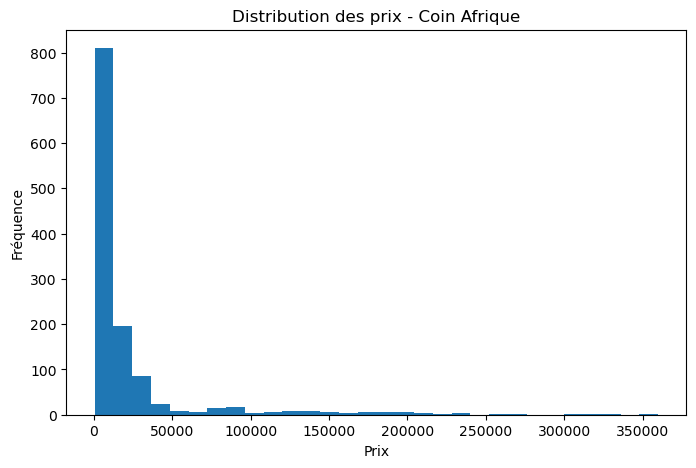

In [32]:
#📊 B. Distribution des prix
plt.figure(figsize=(8,5))
plt.hist(df_coin["Price"], bins=30)
plt.title("Distribution des prix - Coin Afrique")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.show()

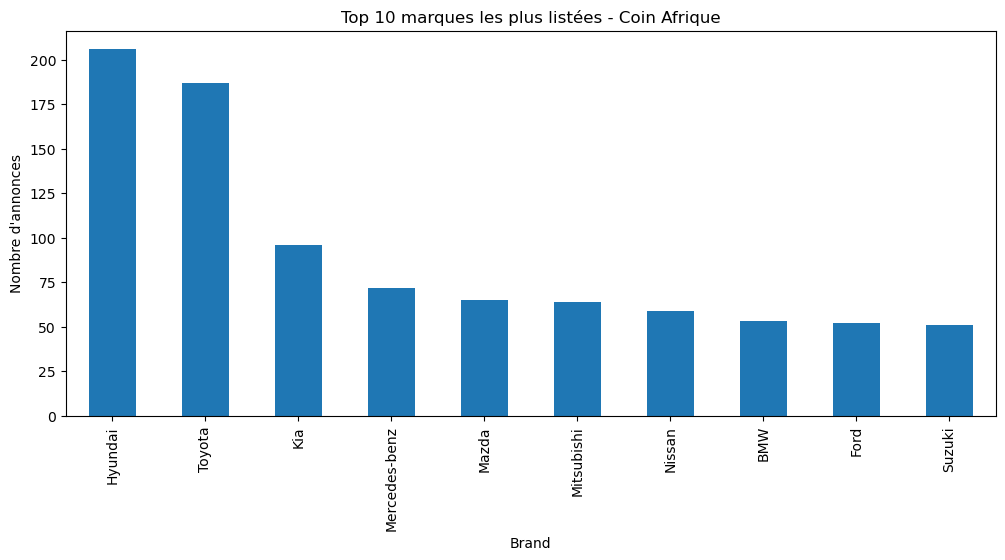

In [34]:
# . Top 10 marques Coin Afrique
plt.figure(figsize=(12,5))
df_coin["Brand"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 marques les plus listées - Coin Afrique")
plt.xlabel("Brand")
plt.ylabel("Nombre d'annonces")
plt.show()

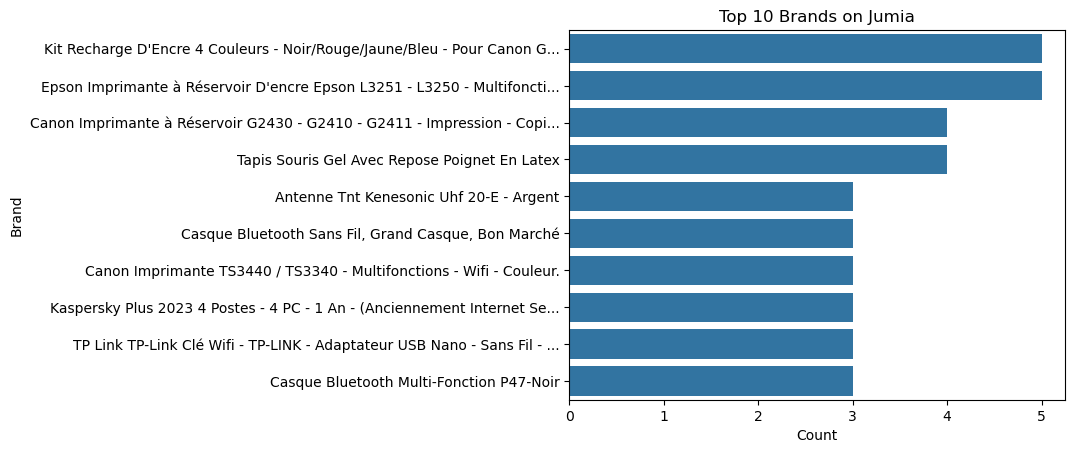

In [43]:
#
import matplotlib.pyplot as plt
import seaborn as sns

# Most frequent brands
top_brands = df_jumia["Brand_name"].value_counts().head(10)
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title("Top 10 Brands on Jumia")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.show()

In [88]:
df_coin2 = pd.read_csv("New_coin_afrique_with_images_test.csv")
df_coin2

,Seller,Location,Price,Image,Brand,Model
0,Auto Boss Compagnie,"Cocody, Abidjan",4 800 000,https://images.coinafrique.com/thumb_5612140_u...,Volkswagen,passat 2013
1,georges williams athouman nze,"Cocody, Abidjan",17 500 000,https://images.coinafrique.com/thumb_5582917_u...,Toyota,Camry 2022
2,georges williams athouman nze,"Cocody, Abidjan",13 900 000,https://images.coinafrique.com/thumb_5582929_u...,Suzuki,grand Vitara 2023
3,DIAKITE ( DK Company ),"Cocody, Abidjan",8 800 000,https://images.coinafrique.com/thumb_5601743_u...,Kia,Forte 2020
4,DIAKITE ( DK Company ),"Cocody, Abidjan",8 950 000,https://images.coinafrique.com/thumb_5601745_u...,Mitsubishi,pajero 2018
...,...,...,...,...,...,...
1462,Diomande,"Yopougon, Abidjan",3 600 000,https://images.coinafrique.com/thumb_5562843_u...,Honda,CR-V 2000
1463,Diomande,"Yopougon, Abidjan",3 500 000,https://images.coinafrique.com/thumb_5562785_u...,Opel,Astra 2002
1464,WilAr-CORP,"Cocody, Abidjan",24 500 000,https://images.coinafrique.com/thumb_5561661_u...,Hyundai,Tucson 2025
1465,Diomande,"Yopougon, Abidjan",3 300 000,https://images.coinafrique.com/thumb_5562763_u...,Nissan,Almera 2013


In [90]:
import pandas as pd
import numpy as np

def supprimer_texte_dataframe(df, colonne):
    """
    Remove rows from a DataFrame where the specified column
    contains non-numeric (text) values.

    Parameters:
        df (DataFrame): The input DataFrame.
        colonne (str): The name of the column to clean.

    Returns:
        DataFrame: A cleaned copy of the DataFrame where the chosen
                   column contains only numeric values.
    """
    
    # Create a copy to avoid modifying the original DataFrame
    df_temp = df.copy()
    
    # Convert the column to numeric; invalid text becomes NaN
    df_temp[colonne] = pd.to_numeric(df_temp[colonne], errors='coerce')
    
    # Drop rows where the column is NaN (non-numeric values)
    df_temp = df_temp.dropna(subset=[colonne])
    
    return df_temp


# Example usage
df = pd.DataFrame({
    'valeurs': [123, "texte", 45.67, "autre", 789, "3.14"]
})

resultat = supprimer_texte_dataframe(df, 'valeurs')
print(resultat)


   valeurs
0   123.00
2    45.67
4   789.00
5     3.14


In [118]:
df= pd.read_csv('CoinAfrique_FINAL.csv')
df

,Seller,Location,Price,Image,Brand,Model
0,Auto Boss Compagnie,"Cocody, Abidjan",4 800 000,https://images.coinafrique.com/thumb_5612140_u...,Volkswagen,passat 2013
1,georges williams athouman nze,"Cocody, Abidjan",17 500 000,https://images.coinafrique.com/thumb_5582917_u...,Toyota,Camry 2022
2,georges williams athouman nze,"Cocody, Abidjan",13 900 000,https://images.coinafrique.com/thumb_5582929_u...,Suzuki,grand Vitara 2023
3,DIAKITE ( DK Company ),"Cocody, Abidjan",8 800 000,https://images.coinafrique.com/thumb_5601743_u...,Kia,Forte 2020
4,DIAKITE ( DK Company ),"Cocody, Abidjan",8 950 000,https://images.coinafrique.com/thumb_5601745_u...,Mitsubishi,pajero 2018
...,...,...,...,...,...,...
1462,Diomande,"Yopougon, Abidjan",3 600 000,https://images.coinafrique.com/thumb_5562843_u...,Honda,CR-V 2000
1463,Diomande,"Yopougon, Abidjan",3 500 000,https://images.coinafrique.com/thumb_5562785_u...,Opel,Astra 2002
1464,WilAr-CORP,"Cocody, Abidjan",24 500 000,https://images.coinafrique.com/thumb_5561661_u...,Hyundai,Tucson 2025
1465,Diomande,"Yopougon, Abidjan",3 300 000,https://images.coinafrique.com/thumb_5562763_u...,Nissan,Almera 2013


In [109]:
import pandas as pd
import numpy as np

# ===============================
#  FUNCTION 1 — Clean Price Column
# ===============================

def cleaned_price(df):
    """
    Clean the Price column by handling non-numeric values,
    removing noisy characters, converting to numeric,
    and reporting problematic entries.
    """
    df_clean = df.copy()
    
    # Original Price column (copy before cleaning)
    original_prices = df_clean['Price'].copy()
    
    # Step 1 — Normalize the text values of Price
    cleaned_prices = (
        original_prices
        .astype(str)
        .str.replace(' ', '', regex=False)   # Remove spaces
        .str.lower()                         # Lowercase text
    )
    
    # Step 2 — Identify invalid (non-numeric) values
    non_numeric_values = cleaned_prices[~cleaned_prices.str.match(r'^\d+\.?\d*$', na=False)]
    
    if not non_numeric_values.empty:
        print("⚠ Non-numeric values detected in Price:")
        for value in non_numeric_values.unique():
            print(f"   - '{value}'")
        
        # Replace non-numeric values with NaN
        df_clean['Price'] = pd.to_numeric(cleaned_prices, errors='coerce')
        
        # Count results
        non_converted = df_clean['Price'].isna().sum()
        converted = len(df_clean) - non_converted
        
        print("\n Conversion Summary:")
        print(f"   ✓ {converted} values successfully converted to numeric")
        print(f"   ⚠ {non_converted} non-numeric values replaced with NaN")
        
        # Optional: remove problematic rows
        choice = input("\nDo you want to delete rows with invalid Price values? (y/n): ")
        if choice.lower() == 'y':
            df_clean = df_clean.dropna(subset=['Price'])
            print(f"✓ {non_converted} rows removed")
    
    else:
        # All values are numeric
        df_clean['Price'] = pd.to_numeric(cleaned_prices)
        print("✓ All Price values converted to numeric")
    
    return df_clean




def verifier_et_corriger_formats(df):
    """
    Check and correct CSV column formats in a safe and complete way.
    Handles: Price column, text columns, and image URL column.
    """
    df_clean = df.copy()
    
    print("INITIAL DATA TYPES:")
    print(df_clean.dtypes)
    print("\n" + "="*50)
    
    # 1. Clean the Price column
    df_clean = cleaned_price(df_clean)
    
    # 2. Validate other columns
    print("\n=== CHECKING OTHER COLUMNS ===")
    
    text_columns = ['Seller', 'Location', 'Brand', 'Model']
    for col in text_columns:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].astype(str).str.strip()
            print(f"✓ '{col}' column validated as text")
    
    # Validate Image URL column
    if 'Image' in df_clean.columns:
        df_clean['Image'] = df_clean['Image'].astype(str).str.strip()
        valid_urls = df_clean['Image'].str.startswith('http').sum()
        print(f"✓ Image column checked: {valid_urls} valid URLs")
    
    # Final verification
    print("\n=== FINAL VERIFICATION ===")
    print(f"Total rows: {len(df_clean)}")
    print(f"Columns: {list(df_clean.columns)}")
    print("\nFinal data types:")
    print(df_clean.dtypes)
    
    print("\n=== PREVIEW OF CLEANED DATA ===")
    print(df_clean.head())
    
    return df_clean




def nettoyage_simple(df):
    """
    Simpler and fully automatic cleaning version.
    No user interaction. Good for fast preprocessing.
    """
    df_clean = df.copy()
    
    # Clean Price column
    df_clean['Price'] = (
        df_clean['Price']
        .astype(str)
        .str.replace(' ', '', regex=False)


FORMATS INITIAUX :
Seller      object
Location    object
Price       object
Image       object
Brand       object
Model       object
dtype: object

=== NETTOYAGE DE LA COLONNE PRICE ===
⚠ Valeurs non numériques détectées dans Price :
   - 'prixsurdemande'

📊 Résultat de la conversion :
   ✓ 1460 valeurs converties en numérique
   ⚠ 7 valeurs non numériques remplacées par NaN



Voulez-vous supprimer les lignes avec des prix non numériques ? (o/n) :  o


✓ 7 lignes supprimées

=== VÉRIFICATION DES AUTRES COLONNES ===
✓ 'Seller' : format texte vérifié
✓ 'Location' : format texte vérifié
✓ 'Brand' : format texte vérifié
✓ 'Model' : format texte vérifié
✓ 'Image' : 1460 URLs valides

=== VÉRIFICATION FINALE ===
Lignes totales : 1460
Colonnes : ['Seller', 'Location', 'Price', 'Image', 'Brand', 'Model']

Types de données finaux :
Seller       object
Location     object
Price       float64
Image        object
Brand        object
Model        object
dtype: object

=== APERÇU DES DONNÉES NETTOYÉES ===
                          Seller         Location       Price  \
0            Auto Boss Compagnie  Cocody, Abidjan   4800000.0   
1  georges williams athouman nze  Cocody, Abidjan  17500000.0   
2  georges williams athouman nze  Cocody, Abidjan  13900000.0   
3        DIAKITE  ( DK Company )  Cocody, Abidjan   8800000.0   
4        DIAKITE  ( DK Company )  Cocody, Abidjan   8950000.0   

                                               Image       

In [111]:
# If df_propre already contains decimal values for Price, convert them to integers
df_propre['Price'] = df_propre['Price'].astype(int)

# Preview to verify the conversion
print("=== DATA WITH INTEGER PRICES ===")
print(df_propre.head())


=== DONNÉES AVEC PRIX ENTIERS ===
                          Seller         Location     Price  \
0            Auto Boss Compagnie  Cocody, Abidjan   4800000   
1  georges williams athouman nze  Cocody, Abidjan  17500000   
2  georges williams athouman nze  Cocody, Abidjan  13900000   
3        DIAKITE  ( DK Company )  Cocody, Abidjan   8800000   
4        DIAKITE  ( DK Company )  Cocody, Abidjan   8950000   

                                               Image       Brand  \
0  https://images.coinafrique.com/thumb_5612140_u...  Volkswagen   
1  https://images.coinafrique.com/thumb_5582917_u...      Toyota   
2  https://images.coinafrique.com/thumb_5582929_u...      Suzuki   
3  https://images.coinafrique.com/thumb_5601743_u...         Kia   
4  https://images.coinafrique.com/thumb_5601745_u...  Mitsubishi   

               Model  
0        passat 2013  
1         Camry 2022  
2  grand Vitara 2023  
3         Forte 2020  
4        pajero 2018  


In [120]:
# Save it
df_propre.to_csv('CoinAfrique_FINAL_nettoye.csv', index=False)
df_propre

,Seller,Location,Price,Image,Brand,Model
0,Auto Boss Compagnie,"Cocody, Abidjan",4800000,https://images.coinafrique.com/thumb_5612140_u...,Volkswagen,passat 2013
1,georges williams athouman nze,"Cocody, Abidjan",17500000,https://images.coinafrique.com/thumb_5582917_u...,Toyota,Camry 2022
2,georges williams athouman nze,"Cocody, Abidjan",13900000,https://images.coinafrique.com/thumb_5582929_u...,Suzuki,grand Vitara 2023
3,DIAKITE ( DK Company ),"Cocody, Abidjan",8800000,https://images.coinafrique.com/thumb_5601743_u...,Kia,Forte 2020
4,DIAKITE ( DK Company ),"Cocody, Abidjan",8950000,https://images.coinafrique.com/thumb_5601745_u...,Mitsubishi,pajero 2018
...,...,...,...,...,...,...
1462,Diomande,"Yopougon, Abidjan",3600000,https://images.coinafrique.com/thumb_5562843_u...,Honda,CR-V 2000
1463,Diomande,"Yopougon, Abidjan",3500000,https://images.coinafrique.com/thumb_5562785_u...,Opel,Astra 2002
1464,WilAr-CORP,"Cocody, Abidjan",24500000,https://images.coinafrique.com/thumb_5561661_u...,Hyundai,Tucson 2025
1465,Diomande,"Yopougon, Abidjan",3300000,https://images.coinafrique.com/thumb_5562763_u...,Nissan,Almera 2013


In [124]:
df_propre=pd.read_csv('CoinAfrique_FINAL_nettoye.csv')
df_propre

,Seller,Location,Price,Image,Brand,Model
0,Auto Boss Compagnie,"Cocody, Abidjan",4800000,https://images.coinafrique.com/thumb_5612140_u...,Volkswagen,passat 2013
1,georges williams athouman nze,"Cocody, Abidjan",17500000,https://images.coinafrique.com/thumb_5582917_u...,Toyota,Camry 2022
2,georges williams athouman nze,"Cocody, Abidjan",13900000,https://images.coinafrique.com/thumb_5582929_u...,Suzuki,grand Vitara 2023
3,DIAKITE ( DK Company ),"Cocody, Abidjan",8800000,https://images.coinafrique.com/thumb_5601743_u...,Kia,Forte 2020
4,DIAKITE ( DK Company ),"Cocody, Abidjan",8950000,https://images.coinafrique.com/thumb_5601745_u...,Mitsubishi,pajero 2018
...,...,...,...,...,...,...
1455,Diomande,"Yopougon, Abidjan",3600000,https://images.coinafrique.com/thumb_5562843_u...,Honda,CR-V 2000
1456,Diomande,"Yopougon, Abidjan",3500000,https://images.coinafrique.com/thumb_5562785_u...,Opel,Astra 2002
1457,WilAr-CORP,"Cocody, Abidjan",24500000,https://images.coinafrique.com/thumb_5561661_u...,Hyundai,Tucson 2025
1458,Diomande,"Yopougon, Abidjan",3300000,https://images.coinafrique.com/thumb_5562763_u...,Nissan,Almera 2013


In [126]:
import pandas as pd

df = pd.read_csv('CoinAfrique_FINAL_nettoye.csv')

# reorganize columns
df_ordered = df[['Brand', 'Model', 'Seller', 'Location', 'Price', 'Image']]

# Save
df_ordered.to_csv('CoinAfrique_FINAL_nettoye.csv', index=False)
print("✅ Datas Organized and saved data")
print(df_ordered.head())

✅ Données organisées et sauvegardées!
        Brand              Model                         Seller  \
0  Volkswagen        passat 2013            Auto Boss Compagnie   
1      Toyota         Camry 2022  georges williams athouman nze   
2      Suzuki  grand Vitara 2023  georges williams athouman nze   
3         Kia         Forte 2020        DIAKITE  ( DK Company )   
4  Mitsubishi        pajero 2018        DIAKITE  ( DK Company )   

          Location     Price  \
0  Cocody, Abidjan   4800000   
1  Cocody, Abidjan  17500000   
2  Cocody, Abidjan  13900000   
3  Cocody, Abidjan   8800000   
4  Cocody, Abidjan   8950000   

                                               Image  
0  https://images.coinafrique.com/thumb_5612140_u...  
1  https://images.coinafrique.com/thumb_5582917_u...  
2  https://images.coinafrique.com/thumb_5582929_u...  
3  https://images.coinafrique.com/thumb_5601743_u...  
4  https://images.coinafrique.com/thumb_5601745_u...  


In [134]:
df_coin= pd.read_csv('CoinAfrique_FINAL.csv')
df_coin

,Brand,Model,Seller,Location,Price,Image
0,Volkswagen,passat 2013,Auto Boss Compagnie,"Cocody, Abidjan",4800000,https://images.coinafrique.com/thumb_5612140_u...
1,Toyota,Camry 2022,georges williams athouman nze,"Cocody, Abidjan",17500000,https://images.coinafrique.com/thumb_5582917_u...
2,Suzuki,grand Vitara 2023,georges williams athouman nze,"Cocody, Abidjan",13900000,https://images.coinafrique.com/thumb_5582929_u...
3,Kia,Forte 2020,DIAKITE ( DK Company ),"Cocody, Abidjan",8800000,https://images.coinafrique.com/thumb_5601743_u...
4,Mitsubishi,pajero 2018,DIAKITE ( DK Company ),"Cocody, Abidjan",8950000,https://images.coinafrique.com/thumb_5601745_u...
...,...,...,...,...,...,...
1455,Honda,CR-V 2000,Diomande,"Yopougon, Abidjan",3600000,https://images.coinafrique.com/thumb_5562843_u...
1456,Opel,Astra 2002,Diomande,"Yopougon, Abidjan",3500000,https://images.coinafrique.com/thumb_5562785_u...
1457,Hyundai,Tucson 2025,WilAr-CORP,"Cocody, Abidjan",24500000,https://images.coinafrique.com/thumb_5561661_u...
1458,Nissan,Almera 2013,Diomande,"Yopougon, Abidjan",3300000,https://images.coinafrique.com/thumb_5562763_u...


In [132]:
#Reinsert
#Connection
connection = pymysql.connect(
    host="localhost",
    user="root",
    password="placali200",
    database="Project_DM",
    charset="utf8mb4",
    autocommit=True
)

cursor = connection.cursor()
print("Connected successfully!")

#Insert
insert_query = """
INSERT INTO coin_afrique_cars (brand, model, seller_name, location, Price, image_url)
VALUES (%s, %s, %s, %s, %s, %s)
"""

for _, row in df_coin.iterrows():
    values = (
        row["Brand"],
        row["Model"],
        row["Seller"],
        row["Location"],
        row["Price"],
        row["Image"]
    )
    cursor.execute(insert_query, values)

connection.commit()
print("✅ CoinAfrique data inserted successfully!")


Connected successfully!
✅ CoinAfrique data inserted successfully!


In [142]:
# script_clean_jumia_fixed.py
import pandas as pd
import numpy as np

def clean_jumia_data():
    """
    Clean the Jumia CSV file .
    """
    # Load the file
    df = pd.read_csv("jumia_cleaned.csv")
    
    print(f"Original rows: {len(df)}")
    print(f"Original columns: {list(df.columns)}")
    print("\nPreview before cleaning:")
    print(df.head())
    
    # 1. Remove duplicate/unused 'Reviews' column
    if 'Reviews' in df.columns:
        df = df.drop('Reviews', axis=1)
        print("✓ Column 'Reviews' removed")
    
    # 2.  conversion of numeric columns
    numeric_columns = ['Price', 'Reviews_rating', 'Reviews_count']
    
    for col in numeric_columns:
        if col in df.columns:
            # Robust numeric conversion
            if col == 'Price':
                # Price should be integer (rounded if needed)
                df[col] = pd.to_numeric(df[col], errors='coerce').round().astype('Int64')
                print(f"✓ Column '{col}' converted to integer")
            elif col == 'Reviews_rating':


=== CHARGEMENT DES DONNÉES ===
Lignes originales : 1232
Colonnes originales : ['brand_name', 'Price', 'discount', 'Reviews', 'image_url', 'Reviews_rating', 'Reviews_count']

Aperçu avant nettoyage :
                                          brand_name   Price discount  \
0  GUEETON Clé USB OTG en métal 128 Go étanche av...  2500.0       5%   
1  GUEETON GUEETON Souris Sans Fil Rechargeable 2...  1710.0       5%   
2  GUEETON 128 GB Metal Usb Flash Drive Adapter C...  2867.0       5%   
3          GUEETON Souris Sans Fil Rechargeable 2.4G  1730.0       5%   
4  GUEETON Clé USB - OTG 128 Go Micro USB Type C ...  2600.0       5%   

              Reviews                                          image_url  \
0  3.5 out of 5(3052)  https://ci.jumia.is/unsafe/fit-in/300x300/filt...   
1    4 out of 5(3008)  https://ci.jumia.is/unsafe/fit-in/300x300/filt...   
2  3.6 out of 5(1659)  https://ci.jumia.is/unsafe/fit-in/300x300/filt...   
3  4.1 out of 5(2126)  https://ci.jumia.is/unsafe/fit-in/3

In [ ]:
#Now insert

In [148]:
import pandas as pd
import mysql.connector
import pandas as pd
import pymysql
#Connection
connection = pymysql.connect(
    host="localhost",
    user="root",
    password="placali200",
    database="Project_DM",
    charset="utf8mb4",
    autocommit=True
)

cursor = connection.cursor()
print("Connected successfully!")




#  load data cleaned
df = pd.read_csv('jumia_data_cleaned.csv')



#  Insert it
cursor = connection.cursor()

for index, row in df.iterrows():
    try:
        cursor.execute("""
            INSERT INTO jumia_products 
            (brand_name, price, discount, reviews_rating, reviews_count, image_url) 
            VALUES (%s, %s, %s, %s, %s, %s)
        """, (
            str(row['brand_name']),
            int(row['Price']),
            str(row['discount']),
            float(row['Reviews_rating']),
            int(row['Reviews_count']),
            str(row['image_url'])
        ))
    except Exception as e:
        print(f"Erreur ligne {index}: {e}")
        continue

connection.commit()
print(f"✅ {len(df)} line insert!")
cursor.close()
connection.close()

Connected successfully!
✅ 1232 lignes insérées!
